#### In this notebook I will try to aggregate property tax data and GTFS data to see if $$$ affects service?

###### Parcel Data -> https://gis-kingcounty.opendata.arcgis.com/datasets/kingcounty::parcels-for-king-county-with-address-with-property-information-parcel-address-area/explore?location=47.638247%2C-122.540210%2C12.29

###### Tax Data --> https://data.kingcounty.gov/Property-Assessments/Real-Property-Tax-Receivables/dkna-i698/about_data

###### GTFS data ---> https://transitfeeds.com/l/66-seattle-wa-usa (seattle) https://transitfeeds.com/p/king-county-metro/73 (KC metro)

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib as plt

import gtfs_kit as gt

import h3pandas


pd.set_option('display.max_columns', None) ### This line makes all the columns display, rather than ellipses shorten

In [3]:
parcel_data_frame = gpd.read_file("C:/Users/aaron/Code/Data/Parcels_for_King_County_with_Address_with_Property_Information___parcel_address_area.zip")
tax_data_frame = pd.read_csv("C:/Users/aaron/Code/Data/Real_Property_Tax_Receivables.csv")
transit_feed = gt.read_feed('C:/Users/aaron/Code/Data/GTFS/KC_Metro_2023_12_06.zip', dist_units = 'mi')

In [5]:
parcel_data_frame.head()

,OBJECTID,MAJOR,MINOR,PIN,COMMENTS,SITETYPE,SITEID,ADDR_HN,ADDR_PD,ADDR_PT,ADDR_SN,ADDR_ST,ADDR_SD,ADDR_NUM,ADDR_FULL,FULLNAME,ZIP5,PLUS4,CTYNAME,POSTALCTYN,LAT,LON,POINT_X,POINT_Y,COUNTY,KROLL,KCTP_CITY,KCTP_STATE,PLSS,PROP_NAME,PLAT_NAME,PLAT_LOT,PLAT_BLOCK,LOTSQFT,LEVYCODE,LEVY_JURIS,NEW_CONSTR,TAXVAL_RSN,APPRLNDVAL,APPR_IMPR,TAX_LNDVAL,TAX_IMPR,ACCNT_NUM,KCTP_TAXYR,UNIT_NUM,BLDG_NUM,CONDOSITUS,QTS,SEC,TWP,RNG,PRIMARY_AD,ANNEXING_C,PAAUNIQUEN,PROPTYPE,ALIAS1,ALIAS2,KCA_ZONING,KCA_ACRES,LEGALDESC,PREUSE_COD,PREUSE_DES,Shape_Leng,Shape_Area,geometry
0,1,990600,0100,9906000100,None,R1,{A6FE4FE7-F594-4279-8DE4-AEEEA70425B5},119,NW,None,41ST,ST,None,119.0,119 NW 41ST ST,NW 41ST ST,98107,4928,Seattle,SEATTLE,47.656112,-122.358054,1.264674e+06,243051.697093,KING,21,SEATTLE,WA,NE13-25-3,None,ZWICKS 1ST ADD,4,2,4400.0,0010,SEATTLE,N,None,659000.0,244000.0,659000.0,244000.0,990600010005,2023.0,None,None,None,NE,13,25,3,1,None,None,R,None,None,NR3,0.101010,ZWICKS 1ST ADD W 40 FT,2.0,Single Family(Res Use/Zone),297.528111,4245.712203,"POLYGON ((-122.35798 47.65626, -122.35798 47.6..."
1,2,990600,0090,9906000090,None,R1,{C02EB04E-58D3-4C9B-83CE-D4BBDDF8A72C},115,NW,None,41ST,ST,None,115.0,115 NW 41ST ST,NW 41ST ST,98107,4928,Seattle,SEATTLE,47.656112,-122.357895,1.264713e+06,243051.033052,KING,21,SEATTLE,WA,NE13-25-3,None,ZWICKS 1ST ADD,3-4,2,4404.0,0010,SEATTLE,N,None,698000.0,207000.0,698000.0,207000.0,990600009007,2023.0,None,None,None,NE,13,25,3,1,None,None,R,None,None,NR3,0.101102,ZWICKS 1ST ADD W 23.41 FT O...,2.0,Single Family(Res Use/Zone),300.650731,4417.452866,"POLYGON ((-122.35798 47.65626, -122.35791 47.6..."
2,3,990600,0080,9906000080,None,R1,{7E515CEF-6A98-42A8-AE42-4A0382F3D089},111,NW,None,41ST,ST,None,111.0,111 NW 41ST ST,NW 41ST ST,98107,4928,Seattle,SEATTLE,47.656112,-122.357733,1.264753e+06,243050.356872,KING,21,SEATTLE,WA,NE13-25-3,None,ZWICKS 1ST ADD,2-3,2,4400.0,0010,SEATTLE,N,None,698000.0,255000.0,698000.0,255000.0,990600008009,2023.0,None,None,None,NE,13,25,3,1,None,None,R,None,None,NR3,0.101010,ZWICKS 1ST ADD W 13.41 FT O...,2.0,Single Family(Res Use/Zone),300.522770,4409.980644,"POLYGON ((-122.35765 47.65626, -122.35765 47.6..."
3,4,990600,0065,9906000065,None,R1,{46A6992D-BFC2-4469-8EB8-3D51EE025941},4015,None,None,1ST,AVE,NW,4015.0,4015 1ST AVE NW,1ST AVE NW,98107,4908,Seattle,SEATTLE,47.656014,-122.357477,1.264816e+06,243013.160096,KING,21,SEATTLE,WA,NE13-25-3,None,ZWICKS 1ST ADD,1-2,2,3290.0,0010,SEATTLE,N,None,583000.0,190000.0,583000.0,190000.0,990600006508,2023.0,None,None,None,NE,13,25,3,1,None,None,R,None,None,NR3,0.075528,ZWICKS 1ST ADD S 38 FT OF 1...,2.0,Single Family(Res Use/Zone),249.175827,3290.316960,"POLYGON ((-122.35730 47.65607, -122.35730 47.6..."
4,5,990600,0060,9906000060,None,R1,{8ABFC012-D27B-468E-8C10-6587980B7DA8},4017,None,None,1ST,AVE,NW,4017.0,4017 1ST AVE NW,1ST AVE NW,98107,4908,Seattle,SEATTLE,47.656116,-122.357474,1.264817e+06,243050.573079,KING,21,SEATTLE,WA,NE13-25-3,None,ZWICKS 1ST ADD,1-2,2,6234.0,0010,SEATTLE,N,None,776000.0,96000.0,776000.0,96000.0,990600006003,2023.0,None,None,None,NE,13,25,3,1,None,None,R,None,None,NR3,0.143113,ZWICKS 1ST ADD N 72 FT OF 1...,2.0,Single Family(Res Use/Zone),317.712387,6257.447126,"POLYGON ((-122.35730 47.65607, -122.35750 47.6..."


In [15]:
seattle_parcel_frame = parcel_data_frame[parcel_data_frame['CTYNAME'] == 'Seattle']

In [16]:
seattle_parcel_frame

,OBJECTID,MAJOR,MINOR,PIN,COMMENTS,SITETYPE,SITEID,ADDR_HN,ADDR_PD,ADDR_PT,ADDR_SN,ADDR_ST,ADDR_SD,ADDR_NUM,ADDR_FULL,FULLNAME,ZIP5,PLUS4,CTYNAME,POSTALCTYN,LAT,LON,POINT_X,POINT_Y,COUNTY,KROLL,KCTP_CITY,KCTP_STATE,PLSS,PROP_NAME,PLAT_NAME,PLAT_LOT,PLAT_BLOCK,LOTSQFT,LEVYCODE,LEVY_JURIS,NEW_CONSTR,TAXVAL_RSN,APPRLNDVAL,APPR_IMPR,TAX_LNDVAL,TAX_IMPR,ACCNT_NUM,KCTP_TAXYR,UNIT_NUM,BLDG_NUM,CONDOSITUS,QTS,SEC,TWP,RNG,PRIMARY_AD,ANNEXING_C,PAAUNIQUEN,PROPTYPE,ALIAS1,ALIAS2,KCA_ZONING,KCA_ACRES,LEGALDESC,PREUSE_COD,PREUSE_DES,Shape_Leng,Shape_Area,geometry
0,1,990600,0100,9906000100,None,R1,{A6FE4FE7-F594-4279-8DE4-AEEEA70425B5},119,NW,None,41ST,ST,None,119.0,119 NW 41ST ST,NW 41ST ST,98107,4928,Seattle,SEATTLE,47.656112,-122.358054,1.264674e+06,243051.697093,KING,21,SEATTLE,WA,NE13-25-3,None,ZWICKS 1ST ADD,4,2,4400.0,0010,SEATTLE,N,None,659000.0,244000.0,659000.0,244000.0,990600010005,2023.0,None,None,None,NE,13,25,3,1,None,None,R,None,None,NR3,0.101010,ZWICKS 1ST ADD W 40 FT,2.0,Single Family(Res Use/Zone),297.528111,4245.712203,"POLYGON ((-122.35798 47.65626, -122.35798 47.6..."
1,2,990600,0090,9906000090,None,R1,{C02EB04E-58D3-4C9B-83CE-D4BBDDF8A72C},115,NW,None,41ST,ST,None,115.0,115 NW 41ST ST,NW 41ST ST,98107,4928,Seattle,SEATTLE,47.656112,-122.357895,1.264713e+06,243051.033052,KING,21,SEATTLE,WA,NE13-25-3,None,ZWICKS 1ST ADD,3-4,2,4404.0,0010,SEATTLE,N,None,698000.0,207000.0,698000.0,207000.0,990600009007,2023.0,None,None,None,NE,13,25,3,1,None,None,R,None,None,NR3,0.101102,ZWICKS 1ST ADD W 23.41 FT O...,2.0,Single Family(Res Use/Zone),300.650731,4417.452866,"POLYGON ((-122.35798 47.65626, -122.35791 47.6..."
2,3,990600,0080,9906000080,None,R1,{7E515CEF-6A98-42A8-AE42-4A0382F3D089},111,NW,None,41ST,ST,None,111.0,111 NW 41ST ST,NW 41ST ST,98107,4928,Seattle,SEATTLE,47.656112,-122.357733,1.264753e+06,243050.356872,KING,21,SEATTLE,WA,NE13-25-3,None,ZWICKS 1ST ADD,2-3,2,4400.0,0010,SEATTLE,N,None,698000.0,255000.0,698000.0,255000.0,990600008009,2023.0,None,None,None,NE,13,25,3,1,None,None,R,None,None,NR3,0.101010,ZWICKS 1ST ADD W 13.41 FT O...,2.0,Single Family(Res Use/Zone),300.522770,4409.980644,"POLYGON ((-122.35765 47.65626, -122.35765 47.6..."
3,4,990600,0065,9906000065,None,R1,{46A6992D-BFC2-4469-8EB8-3D51EE025941},4015,None,None,1ST,AVE,NW,4015.0,4015 1ST AVE NW,1ST AVE NW,98107,4908,Seattle,SEATTLE,47.656014,-122.357477,1.264816e+06,243013.160096,KING,21,SEATTLE,WA,NE13-25-3,None,ZWICKS 1ST ADD,1-2,2,3290.0,0010,SEATTLE,N,None,583000.0,190000.0,583000.0,190000.0,990600006508,2023.0,None,None,None,NE,13,25,3,1,None,None,R,None,None,NR3,0.075528,ZWICKS 1ST ADD S 38 FT OF 1...,2.0,Single Family(Res Use/Zone),249.175827,3290.316960,"POLYGON ((-122.35730 47.65607, -122.35730 47.6..."
4,5,990600,0060,9906000060,None,R1,{8ABFC012-D27B-468E-8C10-6587980B7DA8},4017,None,None,1ST,AVE,NW,4017.0,4017 1ST AVE NW,1ST AVE NW,98107,4908,Seattle,SEATTLE,47.656116,-122.357474,1.264817e+06,243050.573079,KING,21,SEATTLE,WA,NE13-25-3,None,ZWICKS 1ST ADD,1-2,2,6234.0,0010,SEATTLE,N,None,776000.0,96000.0,776000.0,96000.0,990600006003,2023.0,None,None,None,NE,13,25,3,1,None,None,R,None,None,NR3,0.143113,ZWICKS 1ST ADD N 72 FT OF 1...,2.0,Single Family(Res Use/Zone),317.712387,6257.447126,"POLYGON ((-122.35730 47.65607, -122.35750 47.6..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630816,630817,000180,0008,0001800008,None,R1,{C8F576FA-D1BE-4064-A848-EAE9ACBD8758},1526,S,None,ANGELINE,ST,None,1526.0,1526 S ANGELINE ST,S ANGELINE ST,98108,1952,Seattle,SEATTLE,47.560760,-122.312172,1.275311e+06,208056.563015,KING,65,SEATTLE,WA,NW21-24-4,None,COLLINS # 46,POR,None,11970.0,0013,SEATTLE,N,None,337000.0,381000.0,337000.0,381000.0,000180000804,2023.0,None,None,None,NW,21,24,4,1,None,None,R,None,None,NR2,0.274793,COLLINS L M-D C #46 PAR

<Axes: >

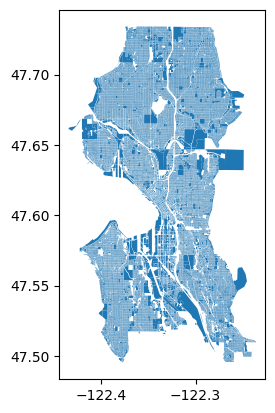

In [17]:
seattle_parcel_frame.plot()

In [23]:
seattle_parcel_frame['ACCNT_NUM'] = seattle_parcel_frame['ACCNT_NUM'].astype(float)

C:\Users\aaron\AppData\Local\Programs\Python\Python310\lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [24]:
parcel_and_tax_frame = pd.merge(seattle_parcel_frame, tax_data_frame, how = 'inner', left_on = 'ACCNT_NUM', right_on = 'Account_Number')

In [25]:
parcel_and_tax_frame.head()

,OBJECTID,MAJOR,MINOR,PIN,COMMENTS,SITETYPE,SITEID,ADDR_HN,ADDR_PD,ADDR_PT,ADDR_SN,ADDR_ST,ADDR_SD,ADDR_NUM,ADDR_FULL,FULLNAME,ZIP5,PLUS4,CTYNAME,POSTALCTYN,LAT,LON,POINT_X,POINT_Y,COUNTY,KROLL,KCTP_CITY,KCTP_STATE,PLSS,PROP_NAME,PLAT_NAME,PLAT_LOT,PLAT_BLOCK,LOTSQFT,LEVYCODE,LEVY_JURIS,NEW_CONSTR,TAXVAL_RSN,APPRLNDVAL,APPR_IMPR,TAX_LNDVAL,TAX_IMPR,ACCNT_NUM,KCTP_TAXYR,UNIT_NUM,BLDG_NUM,CONDOSITUS,QTS,SEC,TWP,RNG,PRIMARY_AD,ANNEXING_C,PAAUNIQUEN,PROPTYPE,ALIAS1,ALIAS2,KCA_ZONING,KCA_ACRES,LEGALDESC,PREUSE_COD,PREUSE_DES,Shape_Leng,Shape_Area,geometry,Account_Number,Account_Status,Levy_Code,Omit_Levy_Code,Tax_Status,Receivable_Type,Bill_Year,Omit_Year,Land_Value,Imps_Value,Forest_Patrol_Acres,Drainage_District,Drainage_Benefit,Drainage_Acres,Billed_Amount,Paid_Amount,Bill_Requestor_Id,Senior_Citizen_Flag,New_Construction_Flag,Change_Reason
0,1,990600,0100,9906000100,None,R1,{A6FE4FE7-F594-4279-8DE4-AEEEA70425B5},119,NW,None,41ST,ST,None,119.0,119 NW 41ST ST,NW 41ST ST,98107,4928,Seattle,SEATTLE,47.656112,-122.358054,1.264674e+06,243051.697093,KING,21,SEATTLE,WA,NE13-25-3,None,ZWICKS 1ST ADD,4,2,4400.0,0010,SEATTLE,N,None,659000.0,244000.0,659000.0,244000.0,9.906000e+11,2023.0,None,None,None,NE,13,25,3,1,None,None,R,None,None,NR3,0.101010,ZWICKS 1ST ADD W 40 FT,2.0,Single Family(Res Use/Zone),297.528111,4245.712203,"POLYGON ((-122.35798 47.65626, -122.35798 47.6...",990600010005,A,9430,0,T,V,2023,0,0,0,0,0,0,0,1247,1247,1190,NaN,NaN,4
1,1,990600,0100,9906000100,None,R1,{A6FE4FE7-F594-4279-8DE4-AEEEA70425B5},119,NW,None,41ST,ST,None,119.0,119 NW 41ST ST,NW 41ST ST,98107,4928,Seattle,SEATTLE,47.656112,-122.358054,1.264674e+06,243051.697093,KING,21,SEATTLE,WA,NE13-25-3,None,ZWICKS 1ST ADD,4,2,4400.0,0010,SEATTLE,N,None,659000.0,244000.0,659000.0,244000.0,9.906000e+11,2023.0,None,None,None,NE,13,25,3,1,None,None,R,None,None,NR3,0.101010,ZWICKS 1ST ADD W 40 FT,2.0,Single Family(Res Use/Zone),297.528111,4245.712203,"POLYGON ((-122.35798 47.65626, -122.35798 47.6...",990600010005,A,9446,0,T,U,2023,0,0,0,0,0,0,0,49322,49322,1190,NaN,NaN,4
2,1,990600,0100,9906000100,None,R1,{A6FE4FE7-F594-4279-8DE4-AEEEA70425B5},119,NW,None,41ST,ST,None,119.0,119 NW 41ST ST,NW 41ST ST,98107,4928,Seattle,SEATTLE,47.656112,-122.358054,1.264674e+06,243051.697093,KING,21,SEATTLE,WA,NE13-25-3,None,ZWICKS 1ST ADD,4,2,4400.0,0010,SEATTLE,N,None,659000.0,244000.0,659000.0,244000.0,9.906000e+11,2023.0,None,None,None,NE,13,25,3,1,None,None,R,None,None,NR3,0.101010,ZWICKS 1ST ADD W 40 FT,2.0,Single Family(Res Use/Zone),297.528111,4245.712203,"POLYGON ((-122.35798 47.65626, -122.35798 47.6...",990600010005,A,10,0,T,R,2023,0,659000,244000,0,0,0,0,733137,733137,1190,NaN,NaN,4
3,1,990600,0100,9906000100,None,R1,{A6FE4FE7-F594-4279-8DE4-AEEEA70425B5},119,NW,None,41ST,ST,None,119.0,119 NW 41ST ST,NW 41ST ST,98107,4928,Seattle,SEATTLE,47.656112,-122.358054,1.264674e+06,243051.697093,KING,21,SEATTLE,WA,NE13-25-3,None,ZWICKS 1ST ADD,4,2,4400.0,0010,SEATTLE,N,None,659000.0,244000.0,659000.0,244000.0,9.906000e+11,2023.0,None,None,None,NE,13,25,3,1,None,None,R,None,None,NR3,0.101010,ZWICKS 1ST ADD W 40 FT,2.0,Single Family(Res Use/Zone),297.528111,4245.712203,"POLYGON ((-122.35798 47.65626, -122.35798 47.6...",990600010005,A,9420,0,T,N,2023,0,0,0,0,0,0,0,624,624,1190,NaN,NaN,4
4,2,990600,0090,9906000090,None,R1,{C02EB04E-58D3-4C9B-83CE-D4BBDDF8A72C},115,NW,None,41ST,ST,None,115.0,115 NW 41ST ST,NW 41ST ST,98107,4928,Seattle,SEATTLE,47.656112,-122.357895,1.264713e+06,243051.033052,KING,21,SEATTLE,WA,NE13-25-3,None,ZWICKS 1ST ADD,3-4,2,4404.0,0010,SEATTLE,N,None,698000.0,207000.0,698000.0,207000.0,9.906000e+11,2023.0,None,None,None,NE,13,25,3,1,None,None,R,None,None,NR3,0.101102,ZWICKS 1ST ADD W 23.41 FT O...,2.0,Single Family(Res Use/Zone),300.650731,4417.452866,"POLYGON ((-122.35798 47.65626, -122.35791 47.6...",990600009007,A,9420,0,T,N,2023,0,0,0,0,0,0,0,624,624,0,NaN,NaN,4


In [27]:
parcel_and_tax_frame.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 715615 entries, 0 to 715614
Data columns (total 85 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   OBJECTID               715615 non-null  int64   
 1   MAJOR                  715615 non-null  object  
 2   MINOR                  715615 non-null  object  
 3   PIN                    715615 non-null  object  
 4   COMMENTS               110606 non-null  object  
 5   SITETYPE               715615 non-null  object  
 6   SITEID                 715615 non-null  object  
 7   ADDR_HN                715615 non-null  object  
 8   ADDR_PD                227601 non-null  object  
 9   ADDR_PT                3 non-null       object  
 10  ADDR_SN                715615 non-null  object  
 11  ADDR_ST                714328 non-null  object  
 12  ADDR_SD                458912 non-null  object  
 13  ADDR_NUM               715615 non-null  float64 
 14  ADDR_FULL   

Text(0.5, 1.0, 'Seattle Project Cost (estimated)')

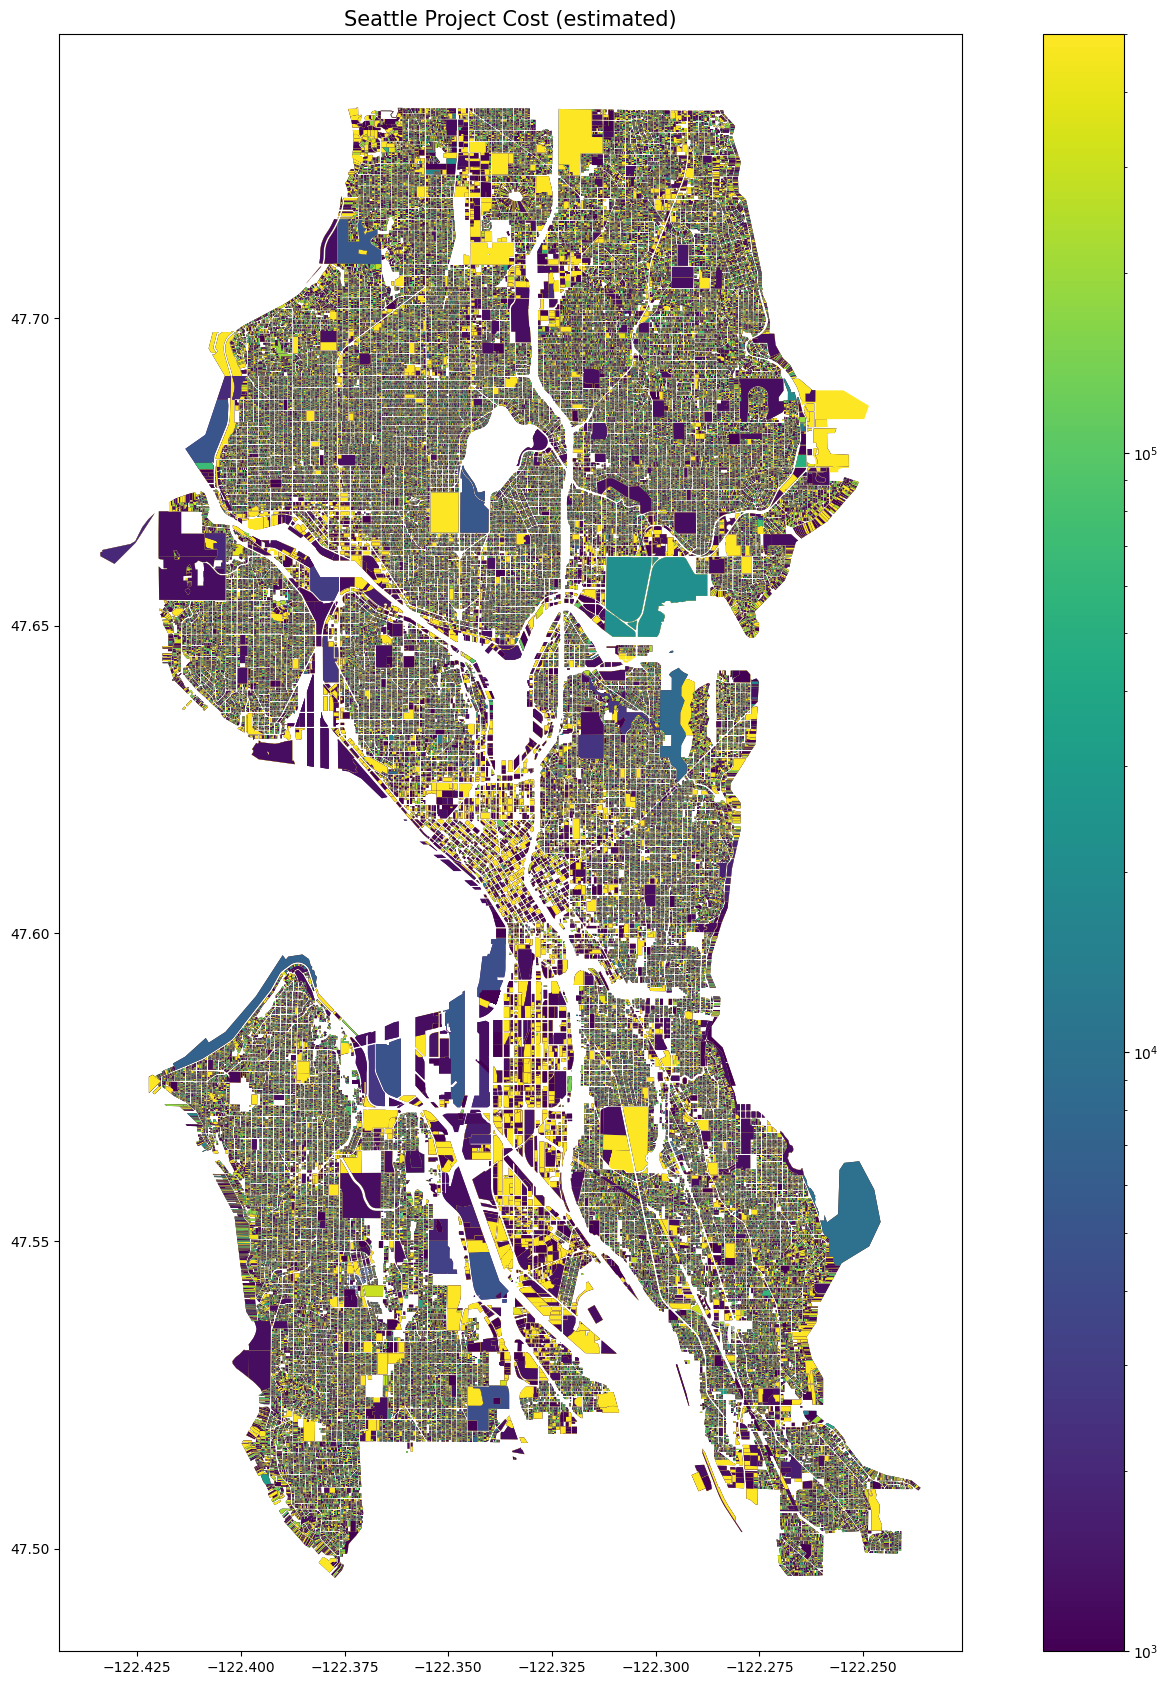

In [34]:
fig, ax = plt.pyplot.subplots(figsize  = (21, 21))

#hexagons = geo_permits_df.h3.geo_to_h3_aggregate(9)
parcel_and_tax_frame.plot(column = 'Billed_Amount',
                legend = True,
                norm=plt.colors.LogNorm(vmin = 1000, vmax = 500000),
                ax = ax)

ax.set_title("Seattle prop tax paid", fontsize=15)

In [36]:
parcel_and_tax_frame.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 715615 entries, 0 to 715614
Data columns (total 85 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   OBJECTID               715615 non-null  int64   
 1   MAJOR                  715615 non-null  object  
 2   MINOR                  715615 non-null  object  
 3   PIN                    715615 non-null  object  
 4   COMMENTS               110606 non-null  object  
 5   SITETYPE               715615 non-null  object  
 6   SITEID                 715615 non-null  object  
 7   ADDR_HN                715615 non-null  object  
 8   ADDR_PD                227601 non-null  object  
 9   ADDR_PT                3 non-null       object  
 10  ADDR_SN                715615 non-null  object  
 11  ADDR_ST                714328 non-null  object  
 12  ADDR_SD                458912 non-null  object  
 13  ADDR_NUM               715615 non-null  float64 
 14  ADDR_FULL   

In [44]:
##### Make a point geometry for hexagon purposes

seattle_point_geo = gpd.GeoDataFrame(
    parcel_and_tax_frame, geometry=gpd.points_from_xy(parcel_and_tax_frame.LON, parcel_and_tax_frame.LAT),  crs="EPSG:4326"
)

<Axes: >

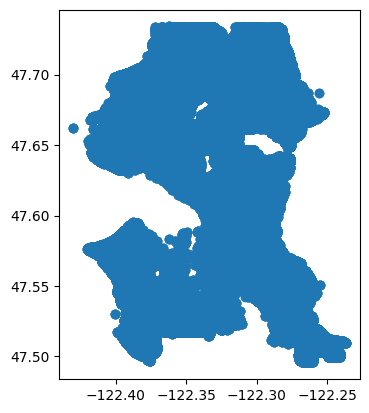

In [45]:
seattle_point_geo.plot(aspect=1)

C:\Users\aaron\AppData\Local\Programs\Python\Python310\lib\site-packages\h3pandas\h3pandas.py:498: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .agg(operation)


Text(0.5, 1.0, 'Seattle Project Cost (estimated)')

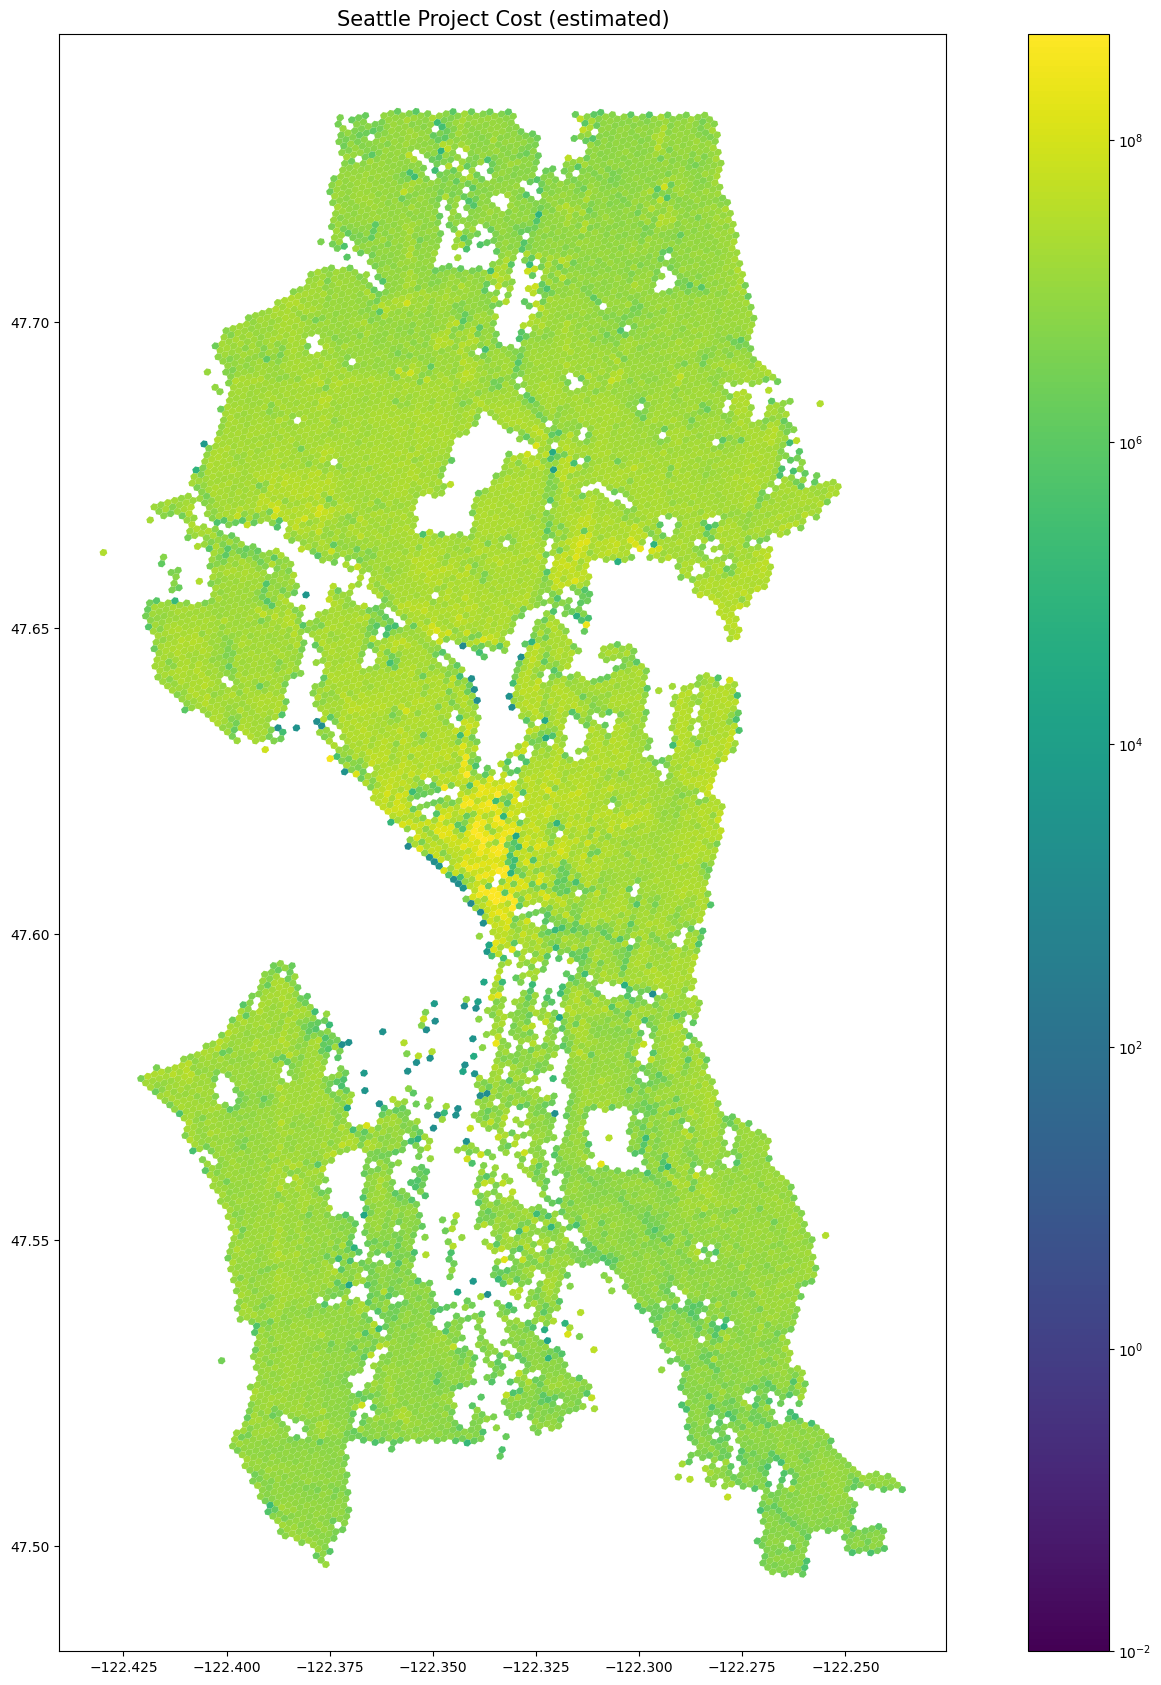

In [53]:
fig, ax = plt.pyplot.subplots(figsize  = (21, 21))

hexagons = seattle_point_geo.h3.geo_to_h3_aggregate(10)
hexagons.plot(column = 'Billed_Amount',
                legend = True,
                norm=plt.colors.LogNorm(vmin = 0.01, vmax = 500000000),
                ax = ax)

ax.set_title("Seattle Project Cost (estimated)", fontsize=15)

In [54]:
#### Ok now lets do some of the GTFS work. 

transit_feed